In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import time
import tt

import functions as B

In [2]:
class Params(object):
 
    def __init__(self):
        #fundamental constants
        self.Na = 6.02214129e+23
        self.kB = 1.381e-23 # J / K
        #gas parameters
        self.Mol = 40e-3 # kg / mol
        self.Rg = 8.3144598  / self.Mol  # J / (kg * K) 
        self.m = self.Mol / self.Na # kg
    
        self.Pr = 2. / 3.
        self.C = 144.4
        self.T_0 = 273.11
        self.mu_0 = 2.125e-05
    
        self.g = 5. / 3.
        
        self.d = 71e-12

p = Params()

L = 40
N = 30
vmax = 2000.

n_l = 2e+23 
u_l = 400.
T_l = 300.

M = u_l / ((p.g * p.Rg * T_l) ** .5)

n_r = (p.g + 1.) * M * M / ((p.g - 1.) * M * M + 2.) * n_l
u_r = ((p.g - 1.) * M * M + 2.) / ((p.g + 1.) * M * M) * u_l
T_r = (2. * p.g * M * M - (p.g - 1.)) * ((p.g - 1.) * M * M + 2.) / ((p.g + 1) ** 2 * M * M) * T_l


l = 1. / ((2 ** .5) * np.pi * n_l * p.d * p.d)

x_l = -20*l
x_r = 20*l

#x_l = -20*l
#x_r = 20*l

Tau = 101

CFL = 0.5

r = 1e-3

time = 123.697651


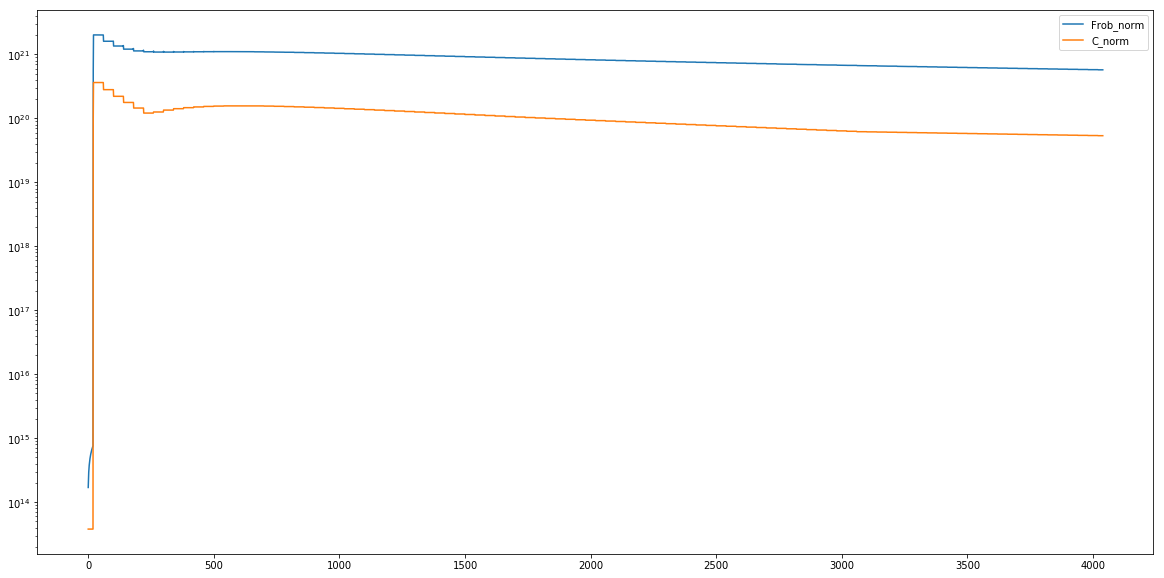

In [3]:
S = B.solver(x_l = x_l, x_r = x_r, L = L, Tau = Tau, CFL = CFL, vmax = vmax,
           N = N, n_l = n_l, u_l = u_l, T_l = T_l, p = p)

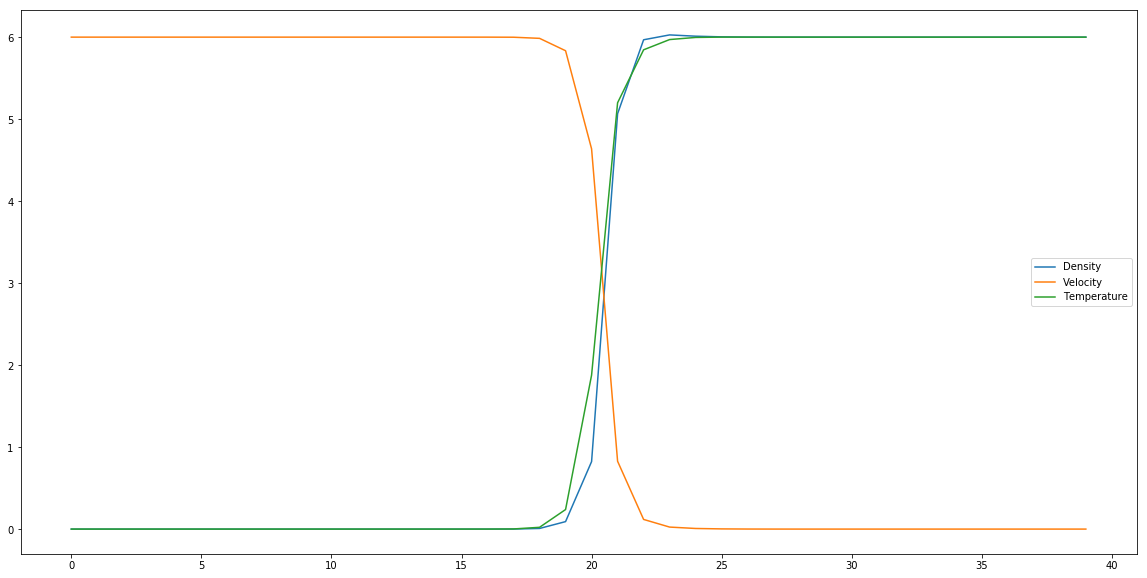

In [4]:
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot(6 * (S[1] - n_l) / (n_r - n_l))
line.set_label('Density')
line, = ax.plot(6 * (S[2] - u_r) / (u_l - u_r))
line.set_label('Velocity')
line, = ax.plot(6 * (S[3] - T_l) / (T_r - T_l))
line.set_label('Temperature')
ax.legend()

time = 110.376018


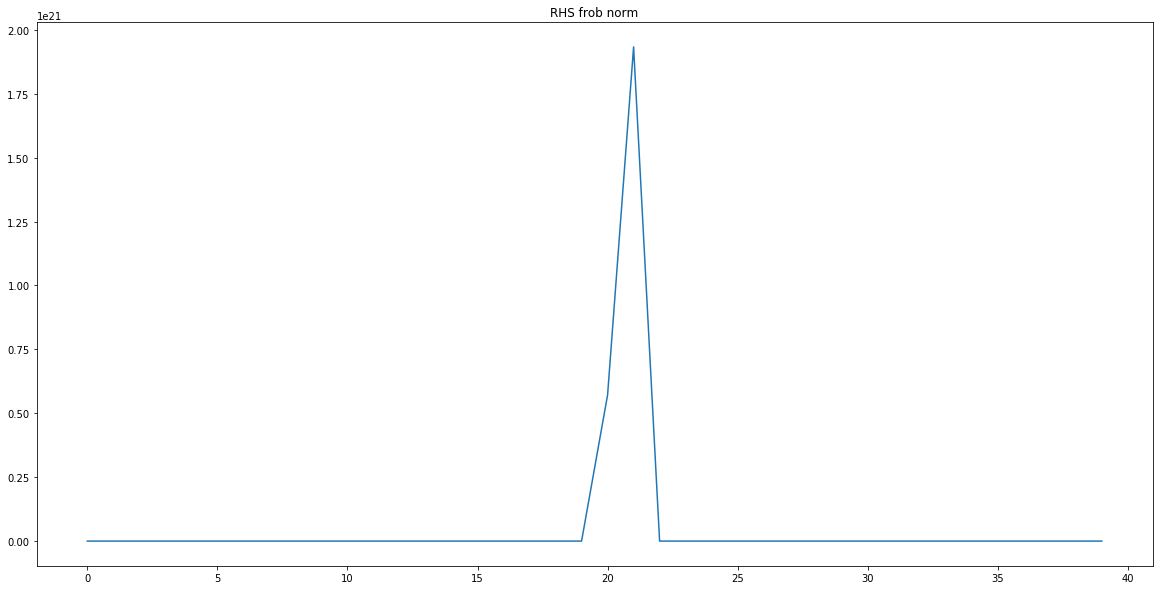

In [6]:
S_tt = B.solver_tt(x_l = x_l, x_r = x_r, L = L, Tau = Tau, CFL = CFL, vmax = vmax,
           N = N, n_l = n_l, u_l = u_l, T_l = T_l, r = r, p = p)

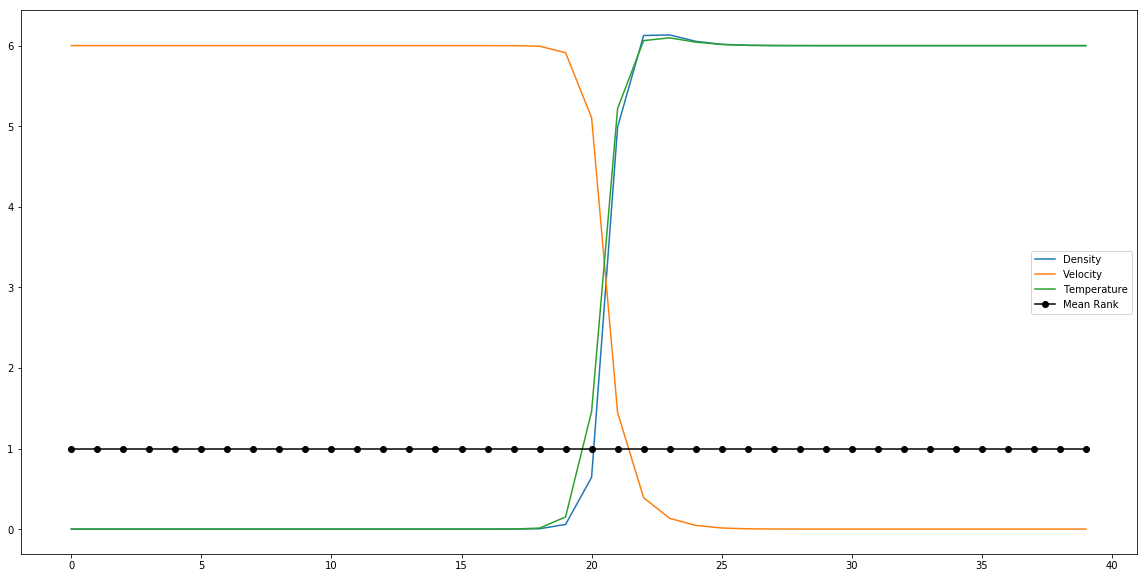

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot(6 * (S_tt[1] - n_l) / (n_r - n_l))#,'ko-')
line.set_label('Density')
line, = ax.plot(6 * (S_tt[2] - u_r) / (u_l - u_r))
line.set_label('Velocity')
line, = ax.plot(6 * (S_tt[3] - T_l) / (T_r - T_l))
line.set_label('Temperature')

s = np.zeros(L)
for i in range(L):
    s[i] = (S_tt[0][i].r[1] + S_tt[0][i].r[2]) / 2.
    
#s = (s - np.min(s)) / (np.max(s) - np.min(s))
    
line, = ax.plot(s,'ko-')
line.set_label('Mean Rank')

ax.legend()

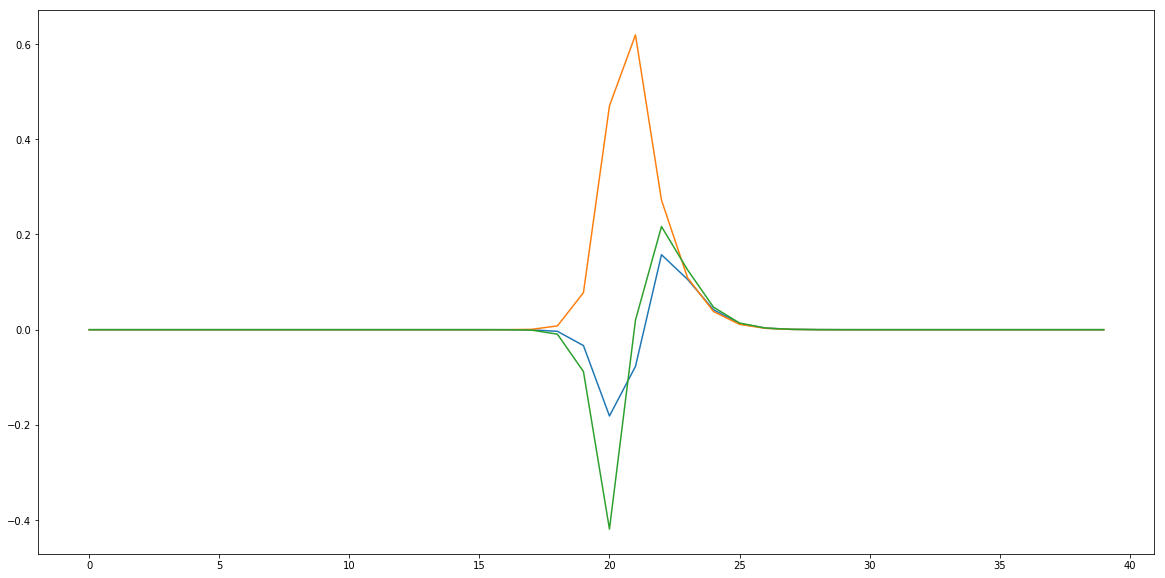

In [10]:
fig, ax = plt.subplots(figsize = (20,10))
line, = ax.plot((6 * (S_tt[1] - n_l) / (n_r - n_l)) - (6 * (S[1] - n_l) / (n_r - n_l)))
line.set_label('Density')
line, = ax.plot((6 * (S_tt[2] - u_r) / (u_l - u_r)) - (6 * (S[2] - u_r) / (u_l - u_r)))
line.set_label('Velocity')
line, = ax.plot((6 * (S_tt[3] - T_l) / (T_r - T_l)) - (6 * (S[3] - T_l) / (T_r - T_l)))
line.set_label('Temperature')